# <center> Computational Intelligence Course </center>
## <center> Homework 3-2: Neural Network</center>
### <center>Authors: Sajede Nicknadaf, Hadis Ahamdian</center>

### حل مساله با شبکه های کانوولوشنی
طبق توضیحات قسمت قبل کتابخوانه های مورد نظر را استفاده و داده ها را نیز باز میکنیم

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers,layers,models
%matplotlib inline

Then, we load the dataset:

In [3]:
def load_data(file_name):
    npzfile = np.load(file_name)
    

    X_train = npzfile["inputs_train"].T / 255.0
    X_valid = npzfile["inputs_valid"].T / 255.0
    X_test = npzfile["inputs_test"].T / 255.0
    Y_train = npzfile["target_train"].tolist()
    Y_valid = npzfile["target_valid"].tolist()
    Y_test = npzfile["target_test"].tolist()

    num_class = max(Y_train + Y_valid + Y_test) + 1
    Y_train_1hot = np.zeros([num_class, len(Y_train)])
    Y_valid_1hot = np.zeros([num_class, len(Y_valid)])
    Y_test_1hot = np.zeros([num_class, len(Y_test)])

    for ii, xx in enumerate(Y_train):
        Y_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_valid):
        Y_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_test):
        Y_test_1hot[xx, ii] = 1.0

    
    return X_train.T, X_valid.T, X_test.T, Y_train_1hot.T, Y_valid_1hot.T, Y_test_1hot.T


Run the next cell to load the dataset you are going to use.

In [4]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("toronto_face.npz")

Now, take a look at an example of a labelled image in the dataset
Feel free to change the value of index below and re-run to see different examples.

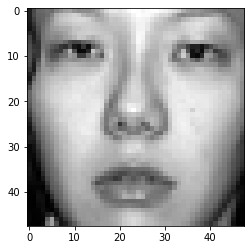

In [5]:
ix = 10;

plt.figure(ix)
plt.imshow(X_train[ix].reshape(48,48,1), interpolation='none', cmap='gray')



From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

ابتدا لازم است فرم داده ها به فرم قابل قبولی برای توابعی که میخواهیم مورد استفاده قرار دهیم تبدیل شود. به این منظور  از 

reshape

استفاده میکنیم و لیبیل ها نیز که به شکل

one hot vector

هستند را به فرم یک عدد که نماینده ی کلاس عکس است تبدیل میکنیم

In [6]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 48, 48, 1)    
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

Y_valid=np.argmax(Y_valid, axis=1)
Y_train=np.argmax(Y_train, axis=1)
Y_test=np.argmax(Y_test, axis=1)

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

print(X_test.shape)
print(Y_test.shape)


(3374, 48, 48, 1)
(3374,)
(419, 48, 48, 1)
(419,)
(385, 48, 48, 1)
(385,)


حال مدل خود را طراحی میکنیم، این مورد از میان آموزش ها و مقالات سایت تنسورفلو انتخاب شده . مدل را ساخته و لایه هایش را به آن اضافه میکنیم. در آخر یک سامری از مدل که تعداد فیلتر های استفاده شده و پارامترهای مدل در مرحله است را مشاهده مینکید

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

در این قسمت مدل را کامپایل کرده و آموزش آن را طی 50 ایپاک روی داده های آموزش شروع میکنیم . هم چنین در طی آموزش خطا و دیگر معیارها را نیز طی هر مرحله حساب میکنیم تا دیدی از چگونگی عملکر آموزش داشته باشیم

In [8]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, 
                    validation_data=(X_valid, Y_valid))


Epoch 1/50
106/106 [==============================] - 17s 156ms/step - loss: 1.7961 - accuracy: 0.3272 - val_loss: 1.4803 - val_accuracy: 0.4439
Epoch 2/50
106/106 [==============================] - 14s 131ms/step - loss: 1.2618 - accuracy: 0.5525 - val_loss: 1.0999 - val_accuracy: 0.6014
Epoch 3/50
106/106 [==============================] - 14s 130ms/step - loss: 0.9849 - accuracy: 0.6497 - val_loss: 0.9367 - val_accuracy: 0.6635
Epoch 4/50
106/106 [==============================] - 15s 140ms/step - loss: 0.8689 - accuracy: 0.6921 - val_loss: 0.8474 - val_accuracy: 0.6945
Epoch 5/50
106/106 [==============================] - 16s 148ms/step - loss: 0.7552 - accuracy: 0.7294 - val_loss: 0.7782 - val_accuracy: 0.7160
Epoch 6/50
106/106 [==============================] - 16s 154ms/step - loss: 0.6536 - accuracy: 0.7691 - val_loss: 0.7175 - val_accuracy: 0.7518
Epoch 7/50
106/106 [==============================] - 15s 144ms/step - loss: 0.5778 - accuracy: 0.7970 - val_loss: 0.6810 - val_ac

آموزش مدل کامل شده و در بالا خطاهای مورد نظر و روند آموزش را مشاهده میکنید در پایین نیز نموداری رسم شده که نشان دهنده ی معیار

accuracy

روی داده های آموزش و داده های ولیدیشن است. میتوان دید در هر ایپاک این معیار به مقدار خوبی افزایش داشته و در نهایت روی داده های آموزش به 100 درصد و روی داده های ولیدیشن به 80 درصد رسیده است. به طور کلی و در مقایسه با قسمت های قبلی میبینیم شبکه های کانوولوشنی برای پردازش تصویر مناسب تر از شبکه های عصبی ساده هستند

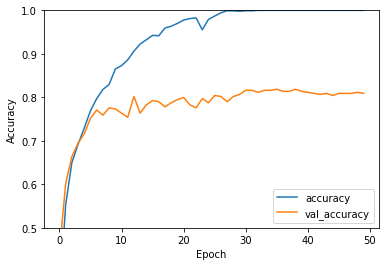

In [9]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


در آخر نیز مدل آموزش داده شده را روی داده های تست امتحان میکنیم و میبینیم که 

accuracy_test=81%

که درصد بسیار خوب و قابل قبولی است و عملکرد شبکه بسیار خوب بوه است

In [11]:
predict=[]
diff=[]
count=0
predict=model.predict(X_test)
predict=np.argmax(predict, axis=1)

for i in range(len(Y_test)):
    diff.append(predict[i]-Y_test[i])

for i in range(len(Y_test)):
    if(diff[i]==0):
        count+=1

print("the accuracy that our trained model has on test data is:")
print(count/len(diff))

the accuracy that our trained model has on test data is:
0.8181818181818182
